In [1]:
# from IPython.core.interactiveshell import InteractiveShell
import sys; sys.path.insert(0, '..')
# # PyTorch
#from torchvision import transforms, datasets
#import torch
#from torch import optim, cuda
#from torch.utils.data import DataLoader
# import torch.nn as nn

#from sklearn.metrics import confusion_matrix
# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)

# # Data science tools
# import numpy as np
# import pandas as pd
# import os

# # Image manipulations
# from PIL import Image
# # Useful for examining network
# # Timing utility
# from timeit import default_timer as timer

# # Visualizations
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['font.size'] = 14

# # Printing out all outputs
# InteractiveShell.ast_node_interactivity = 'all'

In [127]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [2]:
from src.helper import load_checkpoint
from src.make_predictions import *

Train on gpu: False


In [3]:

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# train_on_gpu = cuda.is_available()
# print('Train on gpu: {}'.format(train_on_gpu))

# batch_size=64

In [4]:
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),
#         transforms.RandomRotation(15, resample=Image.BILINEAR),
#         #transforms.ColorJitter(hue=.05, saturation=.05),
#         transforms.ColorJitter(),
#         transforms.RandomHorizontalFlip(),
#         transforms.CenterCrop(size=224),
#         transforms.Grayscale(num_output_channels=3),
#         transforms.ToTensor(),
        
#         #transforms.Lambda(lambda x: x.repeat(3,1,1)),
#         #transforms.Normalize([0.5], [0.5])
#         transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])  # Imagenet standards
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.Grayscale(num_output_channels=3),
#         transforms.ToTensor(),
       
#         #transforms.Lambda(lambda x: x.repeat(3,1,1)),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# #         'test': transforms.Compose([
# #         transforms.Resize(256),
# #         transforms.CenterCrop(224),
# #         transforms.Grayscale(num_output_channels=3),
# #         transforms.ToTensor(),
       
# #         #transforms.Lambda(lambda x: x.repeat(3,1,1)),
# #         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# #     ]),
# }


# # Datasets from each folder
# data = {
#     'train':
#     datasets.ImageFolder(root=traindir, transform=data_transforms['train']),
#     'val':
#     datasets.ImageFolder(root=validdir, transform=data_transforms['val']),
# #     'test':
# #     datasets.ImageFolder(root=testdir, transform=data_transforms['test'])
# }

# # Dataloader iterators
# dataloaders = {
#     'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
#     'val': DataLoader(data['val'], batch_size=batch_size, shuffle=True),
# #     'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True)
# }

In [5]:

# data_dir = '../data/processed/places_boer/output/'

# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

# class_names = image_datasets['train'].classes
# n_classes = len(class_names)

# # Create training and validation dataloaders
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], num_workers=8, batch_size=64, shuffle=True) for x in ['train', 'val']}

In [6]:
# Location of data

model_dir = '../models/'
data_dir = '../data/processed/train/'

# traindir = data_dir + 'train/'
# validdir = data_dir + 'val/'
# testdir = data_dir + 'test/'

#save_file_name = model_dir + 'resnet50-deboer.pth'
checkpoint_path = model_dir + 'resnet50-deboer.pth'


In [7]:
categories = []
img_categories = []
n_train = []

# Iterate through each category
for d in os.listdir(data_dir):
    if os.path.isdir(data_dir + d):
        if len(os.listdir(data_dir + d)) > 9: 
        
            categories.append(d)
            train_imgs = os.listdir(data_dir + d)
            n_train.append(len(train_imgs))

# make Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       }).sort_values('category')


cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head(10)


,category,n_train
57,soccer,426
87,construction_site,410
74,portrait_group,364
51,music_performance,251
22,building_facade,245
32,boats,241
75,crowd,238
96,saint_niclaus,200
104,street,199
92,portrait_individual,197


In [8]:
n_classes = len(cat_df)
print('There are {} different classes.'.format(n_classes))

There are 132 different classes.


## Load model 

In [9]:
model, optimizer = load_checkpoint(path=checkpoint_path)

resnet50


/Users/melvinwevers/virtualenvs/hisvis/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/melvinwevers/virtualenvs/hisvis/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


total parameters: 24062131
total_trainable_params: 554099


# make predictions

../data/processed/train/accident_stretcher/NL-HlmNHA_1478_04484_G.jpg


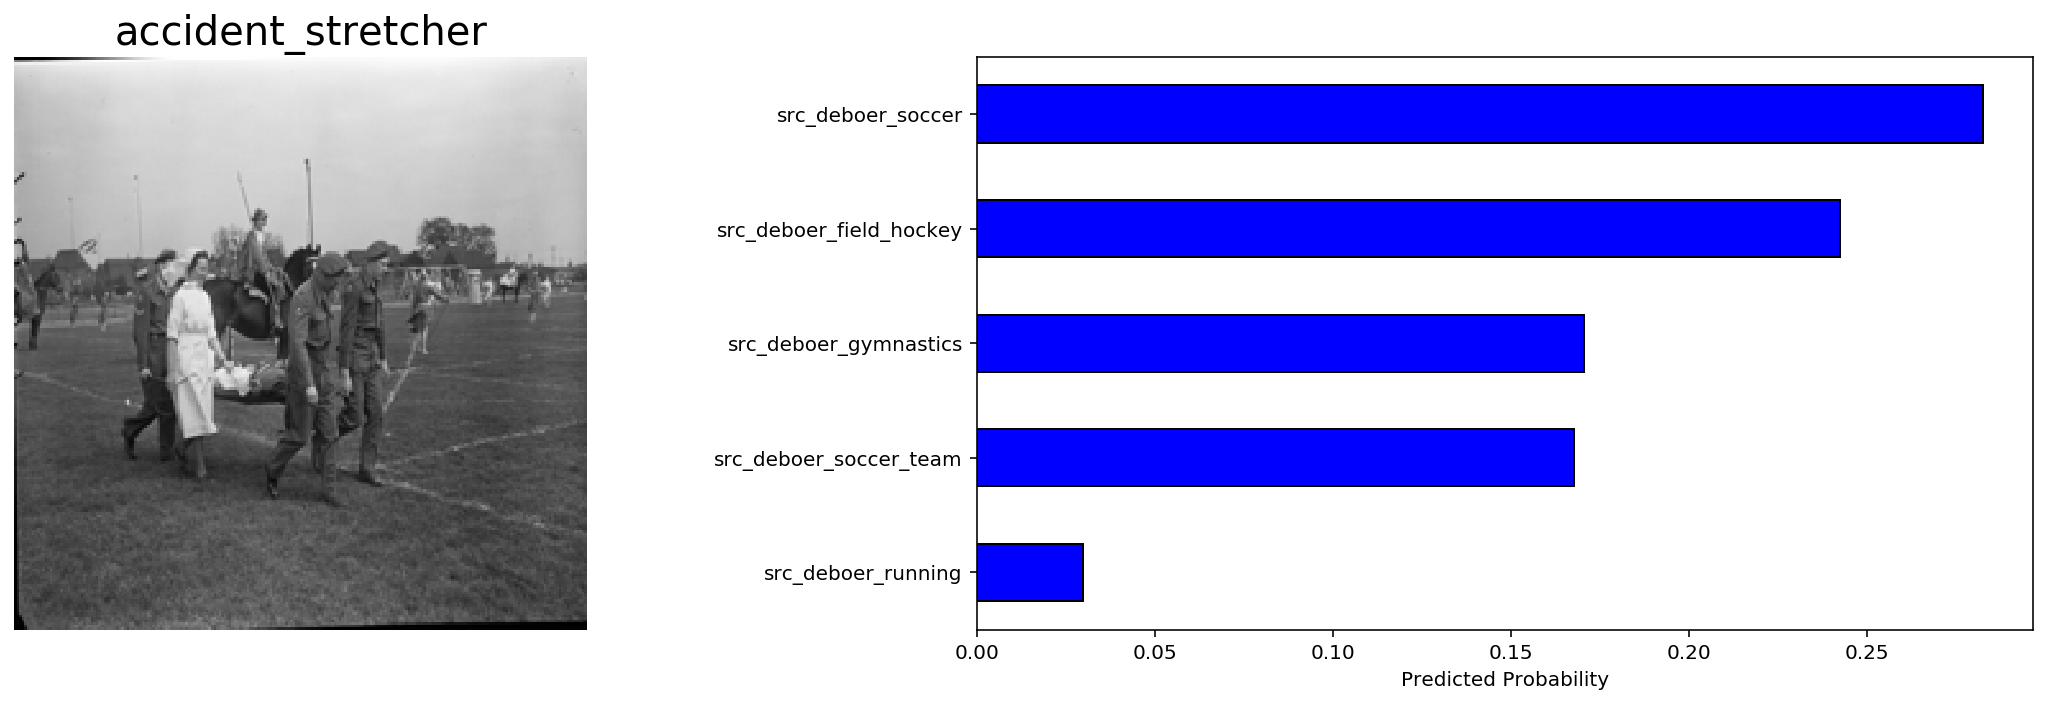

In [241]:
display_prediction(random_test_image(data_dir, cat_df[cat_df['category'] == 'accident_stretcher']['category']), model, topk=5)
plt.savefig('../output/figures/accident_stretcher_example.png', dpi=300)

../data/processed/train/forest:park/NL-HlmNHA_1478_09348_01_G.jpg


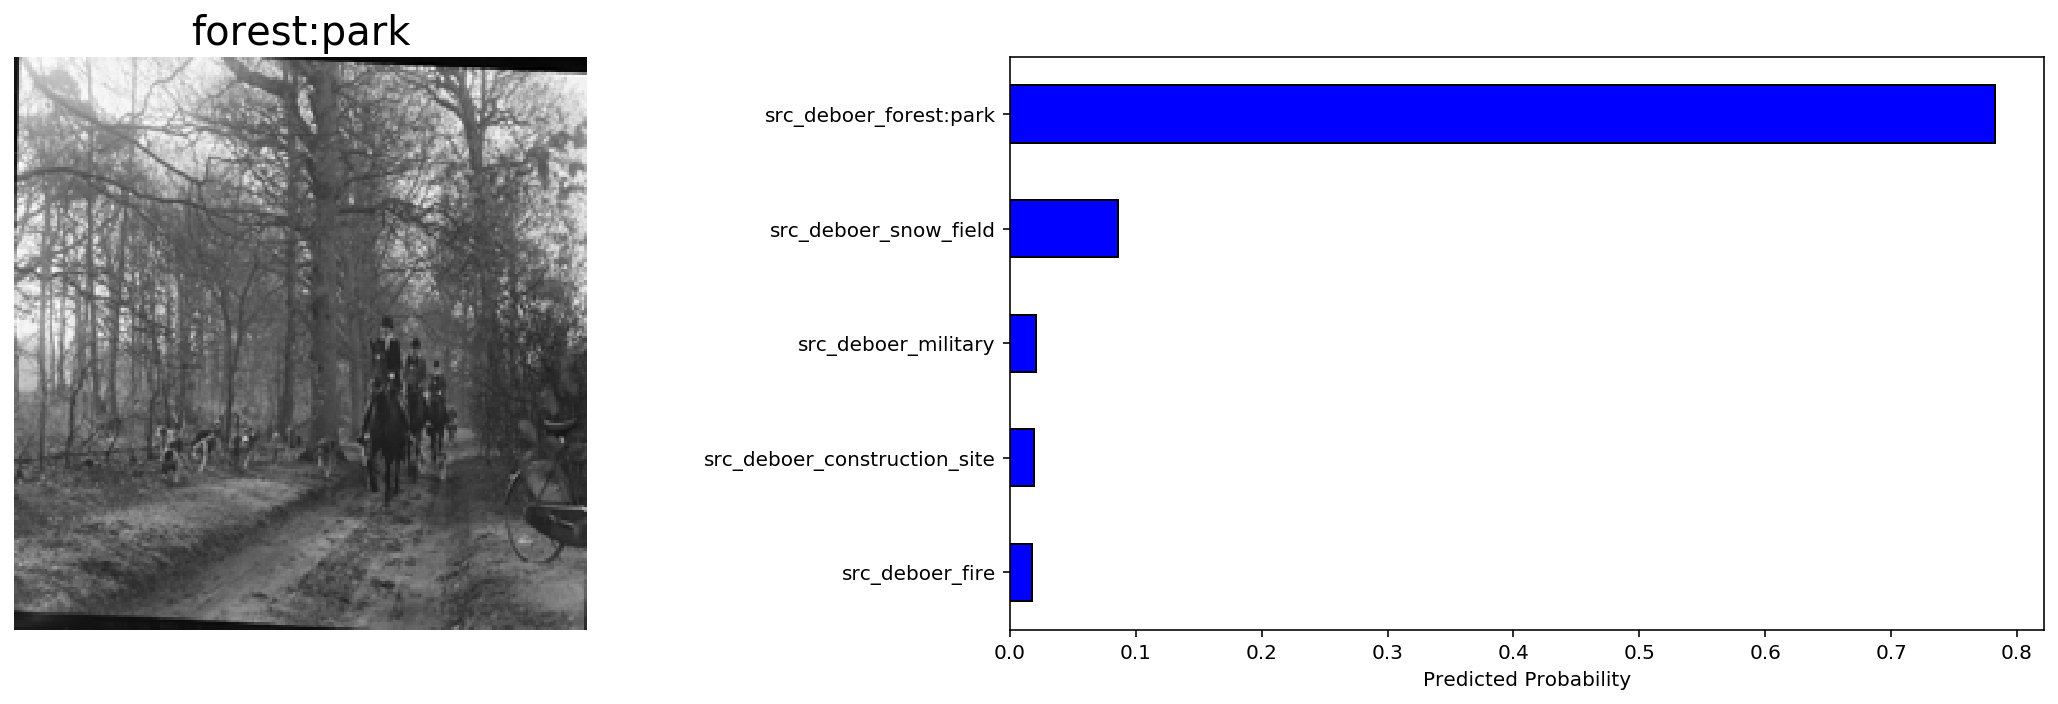

In [200]:
display_prediction(random_test_image(data_dir, cat_df['category']), model, topk=5)

## Model Performance

In [78]:
results = pd.read_csv('../output/results/cross_valid_results.csv')

In [79]:
results = pd.merge(results, cat_df, left_on='class', right_on='category')

In [87]:
results.groupby('class').mean().mean()

top1       50.290089
top5       79.699599
n_train    83.495652
dtype: float64

In [88]:
results.groupby('class').mean().std()

top1       24.250644
top5       18.690699
n_train    74.681120
dtype: float64

In [77]:
results.groupby('class').std().sort_values('top5', ascending=False)

,top1,top5,n_train
class,,,
motorcycle,0.000000,51.639778,0.0
driveway,17.213259,26.293688,0.0
beauty_salon,0.000000,23.570226,0.0
funeral,0.000000,19.720266,0.0
kitchen,13.552619,15.721499,0.0
...,...,...,...
field_hockey,7.905694,0.000000,0.0
basketball,0.000000,0.000000,0.0
soccer_indoor,10.540926,0.000000,0.0


In [121]:
results_ = results.groupby('class').mean().sort_values('top1', ascending=False).head(20)

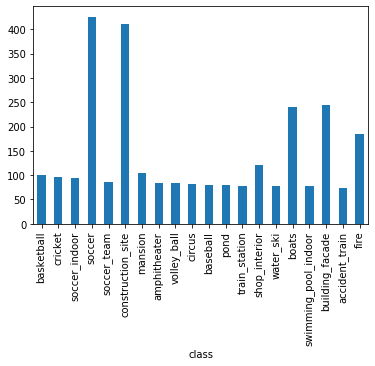

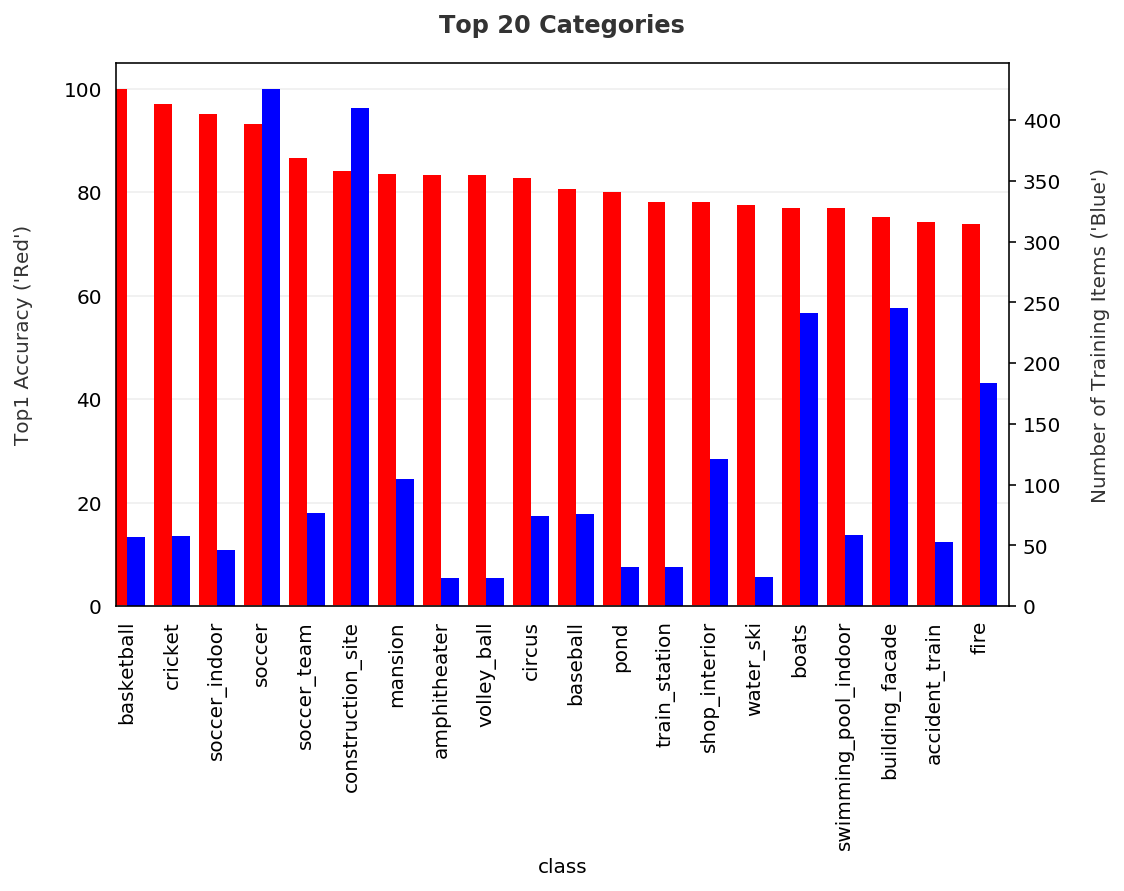

In [143]:
fig = plt.figure(figsize=(8,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

results_['top1'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
results_['n_train'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_ylabel('Top1 Accuracy (\'Red\')', labelpad=15, color='#333333')
ax2.set_ylabel('Number of Training Items (\'Blue\')', labelpad=15, color='#333333')
ax.set_title('Top 20 Categories', pad=15, color='#333333',
             weight='bold')


plt.savefig('../output/figures/top20.png', dpi=300)
plt.show()


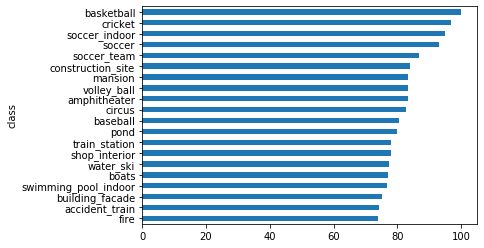

In [113]:
results.groupby('class').mean().sort_values('top1', ascending=False)['top1'].head(20).sort_values(ascending=True).plot.barh()

In [147]:
top5 = results.groupby('class').mean().sort_values('top5', ascending=False)

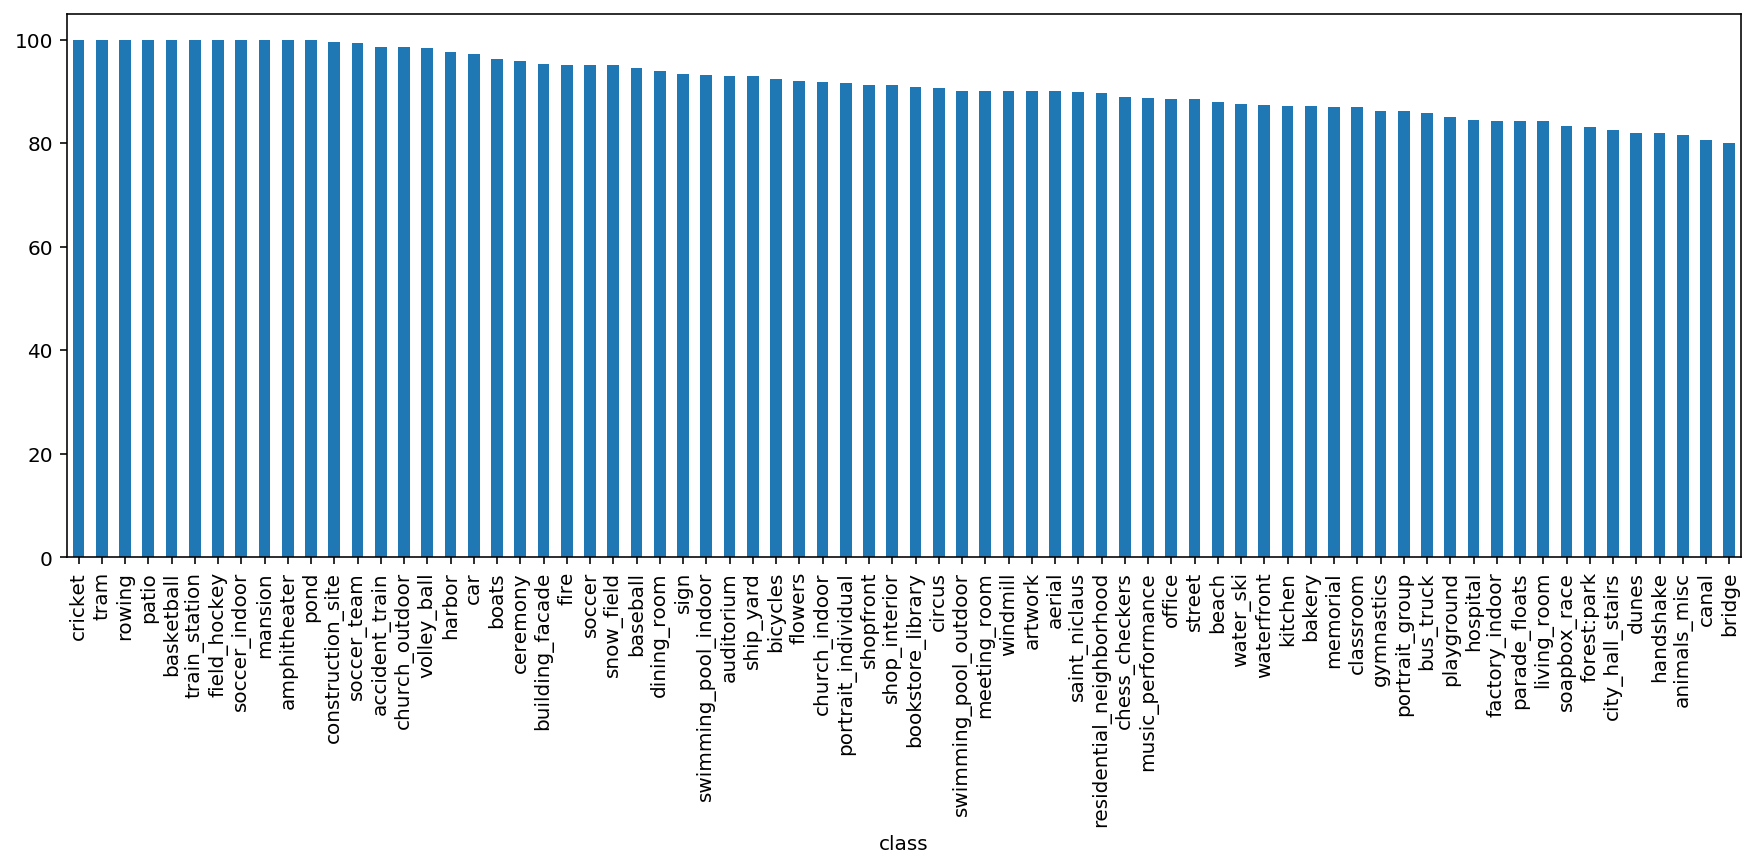

In [155]:
top5[top5['top5'] >= 80]['top5'].plot.bar(figsize=(15,5))
plt.savefig('../output/figures/top5_accuracy.png')

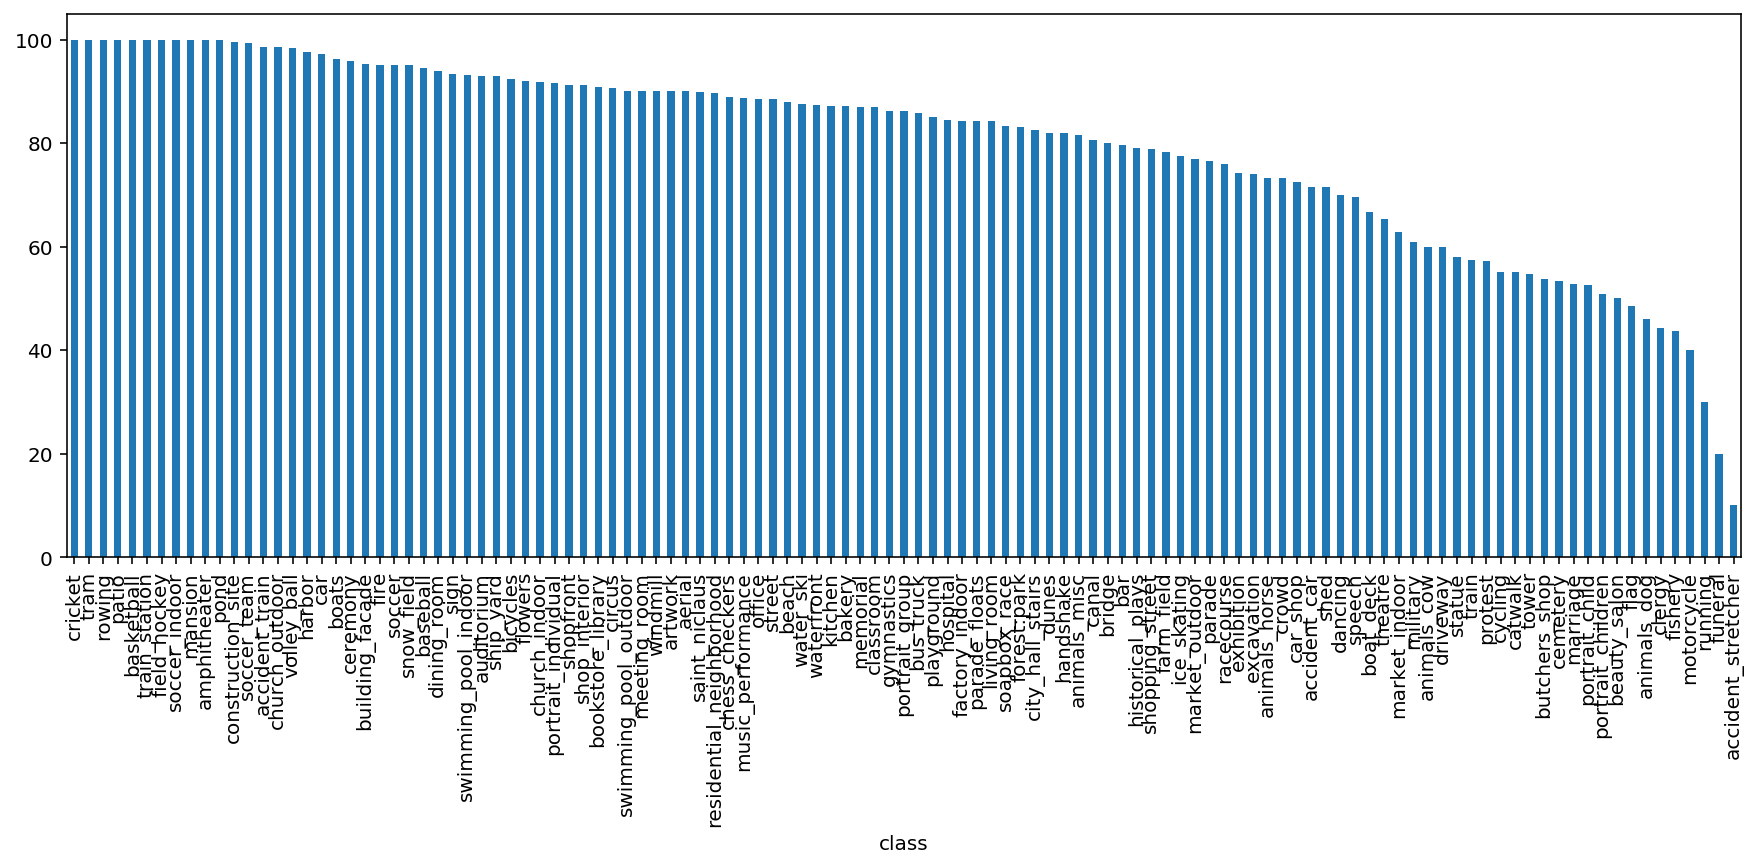

In [140]:
results.groupby('class').mean().sort_values('top5', ascending=False)['top5'].plot.bar(figsize=(15,5))
plt.savefig('../output/figures/top5_accuracy.png')

In [247]:
results_ = results.groupby('class').mean()
results_['top1_std'] = results.groupby('class')['top1'].std()
results_['top5_std'] = results.groupby('class')['top5'].std()

In [250]:
results_ = results_[['n_train', 'top1', 'top1_std', 'top5', 'top5_std']]
results_ = results_.round(2)

In [251]:
print(results_.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  n\_train &    top1 &  top1\_std &    top5 &  top5\_std \\
class                    &          &         &           &         &           \\
\midrule
accident\_car             &       78 &   31.58 &      8.23 &   71.58 &      7.53 \\
accident\_stretcher       &       24 &    0.00 &      0.00 &   10.00 &     14.14 \\
accident\_train           &       53 &   74.29 &     11.27 &   98.57 &      4.52 \\
aerial                   &       59 &   57.00 &      4.83 &   90.00 &      9.43 \\
amphitheater             &       23 &   83.33 &     19.25 &  100.00 &      0.00 \\
animals\_cow              &       23 &   20.00 &     15.81 &   60.00 &     12.91 \\
animals\_dog              &       25 &   20.00 &      0.00 &   46.00 &      9.66 \\
animals\_horse            &       79 &   37.33 &      7.83 &   73.33 &      8.31 \\
animals\_misc             &       85 &   50.00 &     11.44 &   81.58 &      4.47 \\
artwork                  &       49 &   57.00 &     10.59

The number of training items positively correlates to the top1 scores.

In [38]:
round(results_['top1'].corr(results_['n_train']), 3)

0.3

## Make a confusion matrix
This is a slow process on a cpu, I provided predictions

In [34]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'# Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    fig, ax = plt.subplots(figsize=(50,50))

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')# Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")# Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('../output/figures/confusion_matrix.png', dpi=300)
    return ax


In [80]:
#y_true, y_pred = predictions()
predictions_df = pd.read_csv('../data/processed/predictions.csv')

Normalized confusion matrix
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.7 ... 0.  0.  0. ]
 ...
 [0.1 0.  0.  ... 0.2 0.  0. ]
 [0.  0.  0.  ... 0.  0.2 0. ]
 [0.  0.  0.  ... 0.  0.  0.7]]


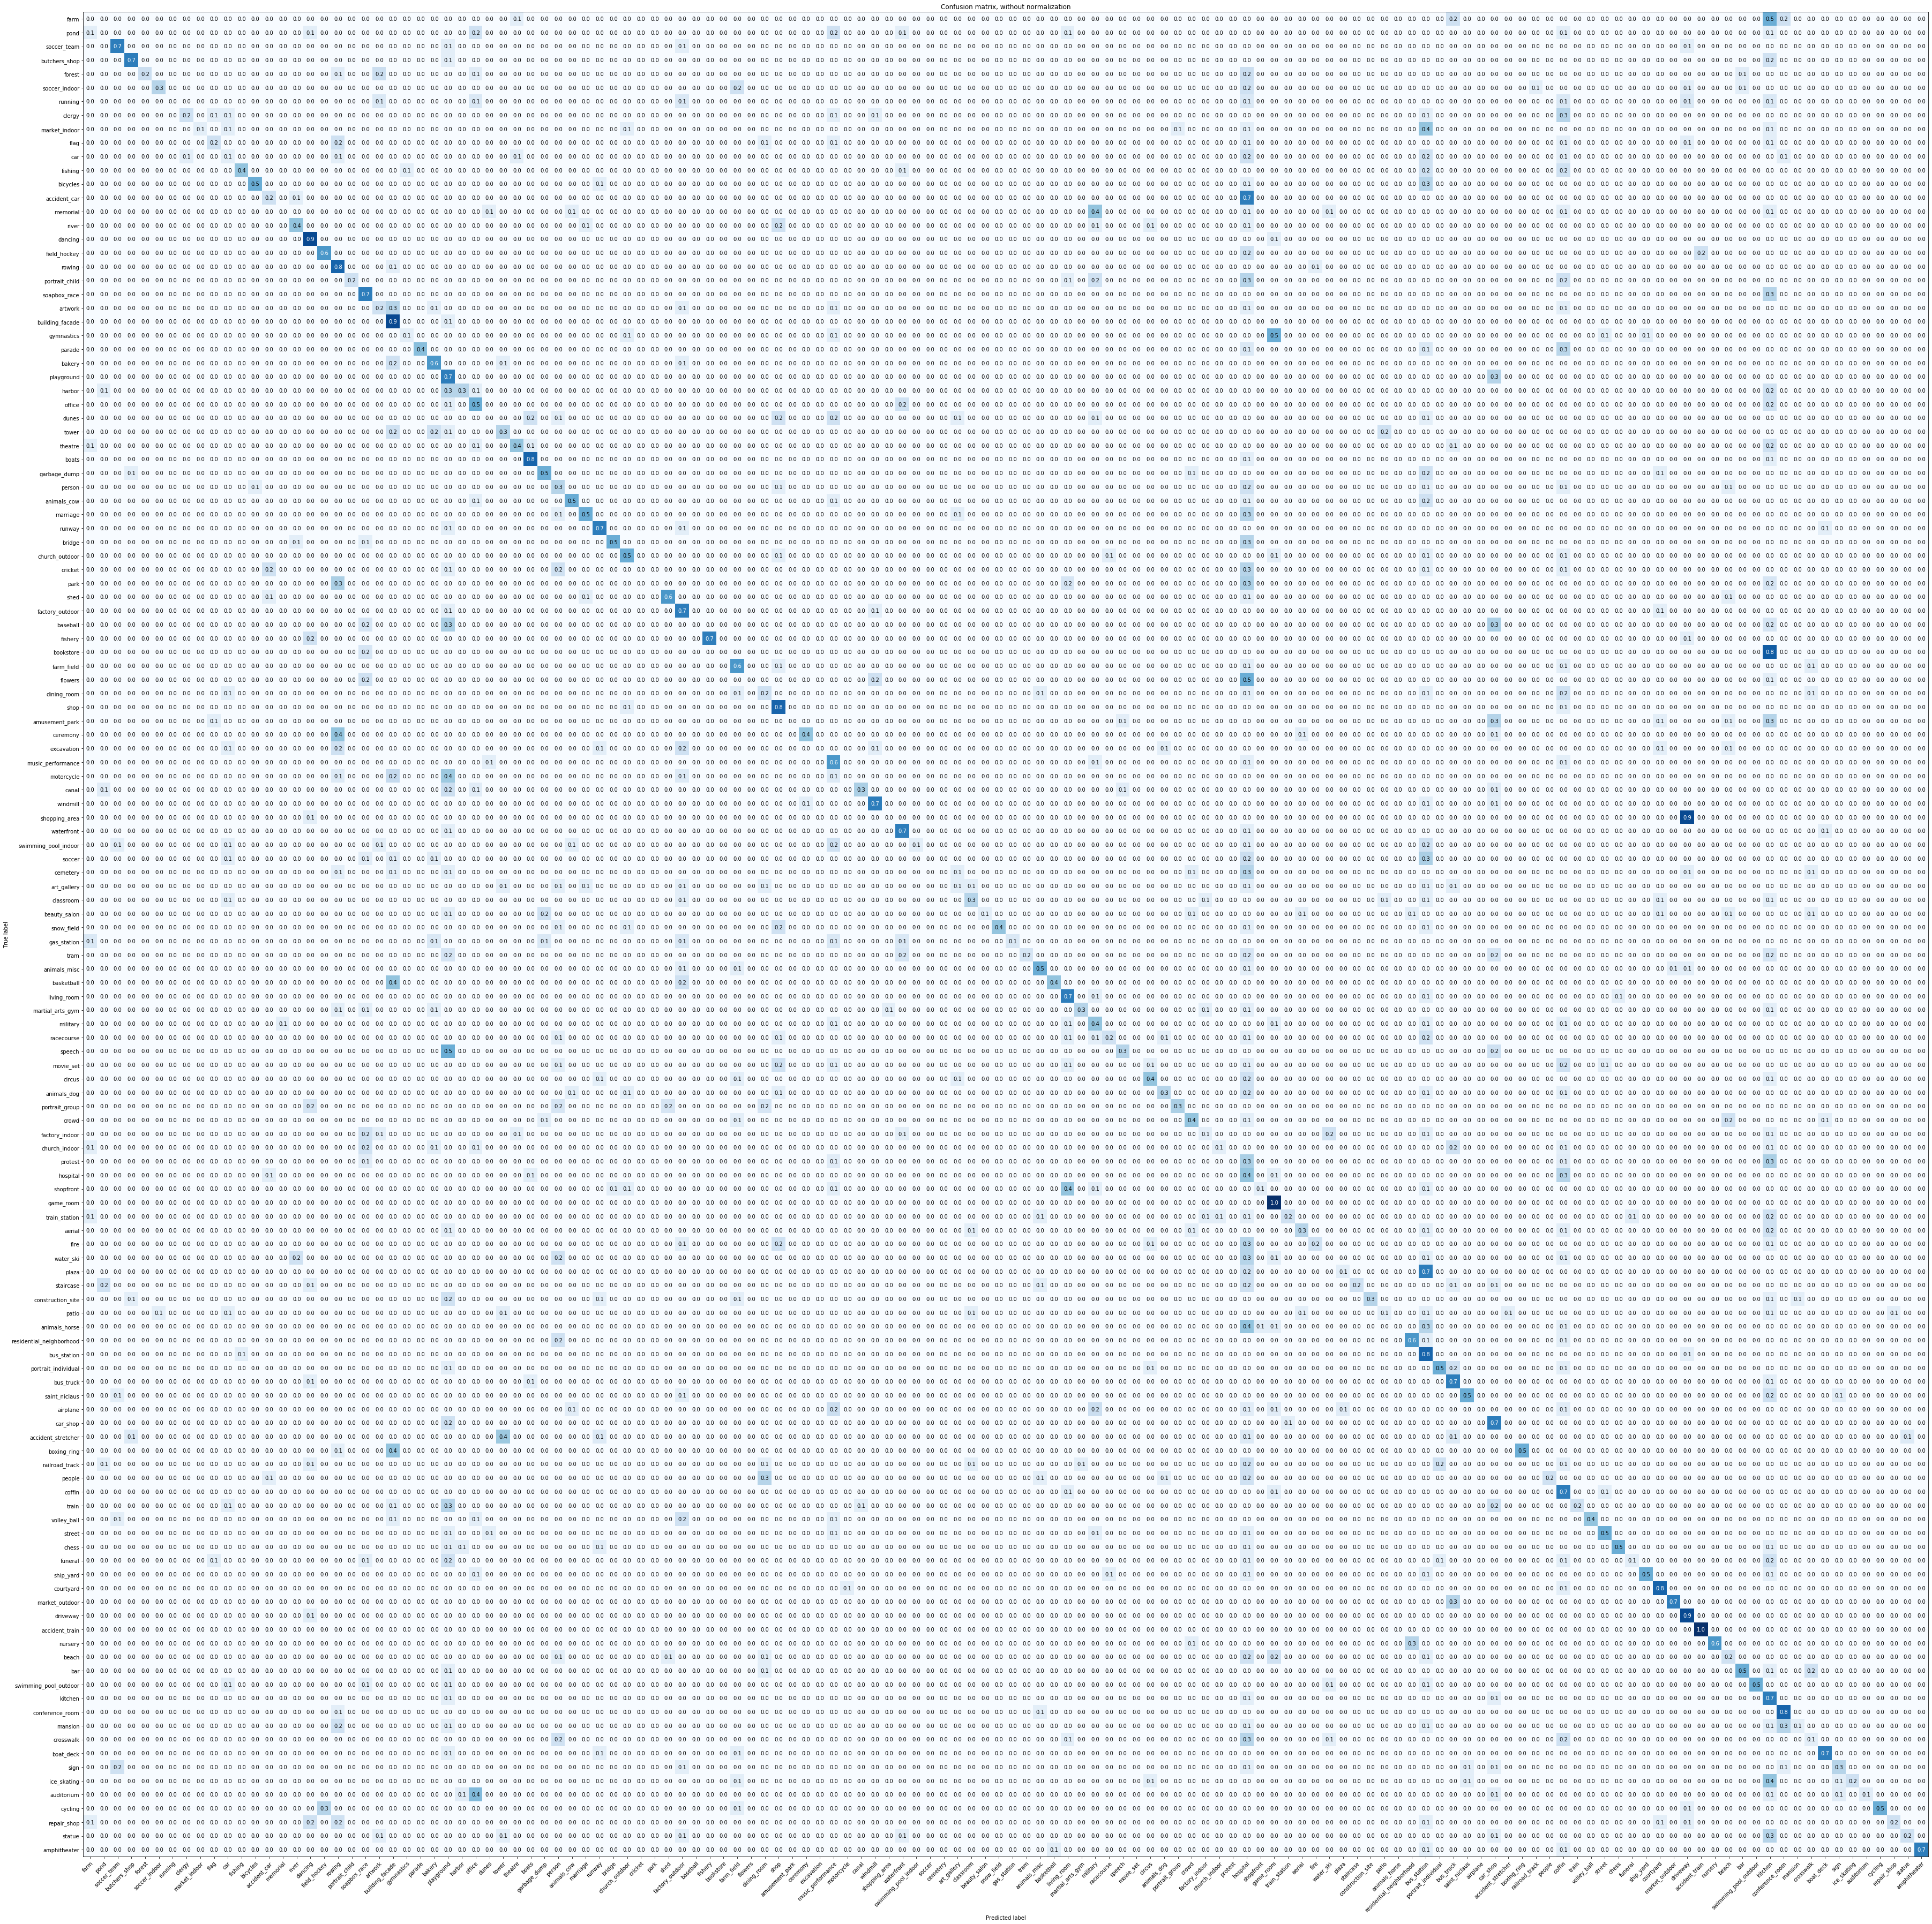

In [81]:
plot_confusion_matrix(predictions_df['y_true'], predictions_df['y_pred'], classes=categories, normalize=True, title='Confusion matrix, without normalization')

In [76]:
plt.savefig('../output/figures/confusion_matrix.png')

<Figure size 432x288 with 0 Axes>